<a href="https://colab.research.google.com/github/Krishna-9795/face/blob/main/medicine_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd 
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

In [ ]:
from google.colab import files
files.upload()

Saving Company_Name.xlsx to Company_Name (2).xlsx


{'Company_Name.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00q\x0e9+p\x01\x00\x00\xa0\x05\x00\x00\x13\x00\xdb\x01[Content_Types].xml \xa2\xd7\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
company=pd.read_excel('Company_Name.xlsx')
company

S.No                        Company_Name  NSE_Symbol Rating  \
0          1  Sun Pharmaceutical Industries Ltd.   SUNPHARMA      S   
1          2        Dr. Reddys Laboratories Ltd.     DRREDDY      R   
2          3             Divis Laboratories Ltd.    DIVISLAB      D   
3          4                          Cipla Ltd.       CIPLA      C   
4          5                         Biocon Ltd.      BIOCON      B   
...      ...                                 ...         ...    ...   
22476  22477             Divis Laboratories Ltd.    DIVISLAB      D   
22477  22478                          Cipla Ltd.       CIPLA      C   
22478  22479                         Biocon Ltd.      BIOCON      B   
22479  22480               Aurobindo Pharma Ltd.  AUROPHARMA     AU   
22480  22481        Torrent Pharmaceuticals Ltd.  TORNTPHARM      T   

                      Industry  
0      Pharmaceuticals & Drugs  
1      Pharmaceuticals & Drugs  
2      Pharmaceuticals & Drugs  
3      Pharmaceuticals & Drugs  
4      Pharmaceuticals & Drugs  
...                        ...  
22476  Pharmaceuticals & Drugs  
22477  Pharmaceuticals & Drugs  
22478  Pharmaceuticals & Drugs  
22479  Pharmaceuticals & Drugs  
22480  Pharmaceuticals & Drugs  

[22481 rows x 5 columns]

In [ ]:
company.head()

S.No                        Company_Name NSE_Symbol Rating  \
0     1  Sun Pharmaceutical Industries Ltd.  SUNPHARMA      S   
1     2        Dr. Reddys Laboratories Ltd.    DRREDDY      R   
2     3             Divis Laboratories Ltd.   DIVISLAB      D   
3     4                          Cipla Ltd.      CIPLA      C   
4     5                         Biocon Ltd.     BIOCON      B   

                  Industry  
0  Pharmaceuticals & Drugs  
1  Pharmaceuticals & Drugs  
2  Pharmaceuticals & Drugs  
3  Pharmaceuticals & Drugs  
4  Pharmaceuticals & Drugs

In [ ]:
company.tail()

S.No                  Company_Name  NSE_Symbol Rating  \
22476  22477       Divis Laboratories Ltd.    DIVISLAB      D   
22477  22478                    Cipla Ltd.       CIPLA      C   
22478  22479                   Biocon Ltd.      BIOCON      B   
22479  22480         Aurobindo Pharma Ltd.  AUROPHARMA     AU   
22480  22481  Torrent Pharmaceuticals Ltd.  TORNTPHARM      T   

                      Industry  
22476  Pharmaceuticals & Drugs  
22477  Pharmaceuticals & Drugs  
22478  Pharmaceuticals & Drugs  
22479  Pharmaceuticals & Drugs  
22480  Pharmaceuticals & Drugs

In [ ]:
company.shape

(22481, 5)

In [ ]:
from google.colab import files
files.upload()

Saving Medicine_description.xlsx to Medicine_description (2).xlsx


{'Medicine_description.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00q\x0e9+p\x01\x00\x00\xa0\x05\x00\x00\x13\x00\xdb\x01[Content_Types].xml \xa2\xd7\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
medicine=pd.read_excel('Medicine_description.xlsx')
medicine

Drug_Name Reason  \
0                   A CN Gel(Topical) 20gmA CN Soap 75gm   Acne   
1      A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   Acne   
2                                 ACGEL CL NANO Gel 15gm   Acne   
3                                    ACGEL NANO Gel 15gm   Acne   
4                                  Acleen 1% Lotion 25ml   Acne   
...                                                  ...    ...   
22476                                T Muce Ointment 5gm  Wound   
22477  Wokadine 10% Solution 100mlWokadine Solution 5...  Wound   
22478                               Wokadine M Onit 10gm  Wound   
22479                           Wound Fix Solution 100ml  Wound   
22480                              Wounsol Ointment 15gm  Wound   

                                             Description  
0                          Mild to moderate acne (spots)  
1      A RET 0.025% is a prescription medicine that i...  
2      It is used to treat acne vulgaris in people 12...  
3      It is used to treat acne vulgaris in people 12...  
4      treat the most severe form of acne (nodular ac...  
...                                                  ...  
22476                            used for treating warts  
22477                      used to soften the skin cells  
22478                                     used for scars  
22479                                    used for wounds  
22480  used to treat and remove raised warts (usually...  

[22481 rows x 3 columns]

In [ ]:
medicine.head()

Drug_Name Reason  \
0               A CN Gel(Topical) 20gmA CN Soap 75gm   Acne   
1  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   Acne   
2                             ACGEL CL NANO Gel 15gm   Acne   
3                                ACGEL NANO Gel 15gm   Acne   
4                              Acleen 1% Lotion 25ml   Acne   

                                         Description  
0                      Mild to moderate acne (spots)  
1  A RET 0.025% is a prescription medicine that i...  
2  It is used to treat acne vulgaris in people 12...  
3  It is used to treat acne vulgaris in people 12...  
4  treat the most severe form of acne (nodular ac...

In [ ]:
medicine.tail()

Drug_Name Reason  \
22476                                T Muce Ointment 5gm  Wound   
22477  Wokadine 10% Solution 100mlWokadine Solution 5...  Wound   
22478                               Wokadine M Onit 10gm  Wound   
22479                           Wound Fix Solution 100ml  Wound   
22480                              Wounsol Ointment 15gm  Wound   

                                             Description  
22476                            used for treating warts  
22477                      used to soften the skin cells  
22478                                     used for scars  
22479                                    used for wounds  
22480  used to treat and remove raised warts (usually...

In [ ]:
medicine.shape

(22481, 3)

In [ ]:
#combining the data frames
combined_data=pd.concat([company,medicine],axis=1)
combined_data

S.No                        Company_Name  NSE_Symbol Rating  \
0          1  Sun Pharmaceutical Industries Ltd.   SUNPHARMA      S   
1          2        Dr. Reddys Laboratories Ltd.     DRREDDY      R   
2          3             Divis Laboratories Ltd.    DIVISLAB      D   
3          4                          Cipla Ltd.       CIPLA      C   
4          5                         Biocon Ltd.      BIOCON      B   
...      ...                                 ...         ...    ...   
22476  22477             Divis Laboratories Ltd.    DIVISLAB      D   
22477  22478                          Cipla Ltd.       CIPLA      C   
22478  22479                         Biocon Ltd.      BIOCON      B   
22479  22480               Aurobindo Pharma Ltd.  AUROPHARMA     AU   
22480  22481        Torrent Pharmaceuticals Ltd.  TORNTPHARM      T   

                      Industry  \
0      Pharmaceuticals & Drugs   
1      Pharmaceuticals & Drugs   
2      Pharmaceuticals & Drugs   
3      Pharmaceuticals & Drugs   
4      Pharmaceuticals & Drugs   
...                        ...   
22476  Pharmaceuticals & Drugs   
22477  Pharmaceuticals & Drugs   
22478  Pharmaceuticals & Drugs   
22479  Pharmaceuticals & Drugs   
22480  Pharmaceuticals & Drugs   

                                               Drug_Name Reason  \
0                   A CN Gel(Topical) 20gmA CN Soap 75gm   Acne   
1      A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   Acne   
2                                 ACGEL CL NANO Gel 15gm   Acne   
3                                    ACGEL NANO Gel 15gm   Acne   
4                                  Acleen 1% Lotion 25ml   Acne   
...                                                  ...    ...   
22476                                T Muce Ointment 5gm  Wound   
22477  Wokadine 10% Solution 100mlWokadine Solution 5...  Wound   
22478                               Wokadine M Onit 10gm  Wound   
22479                           Wound Fix Solution 100ml  Wound   
22480                              Wounsol Ointment 15gm  Wound   

                                             Description  
0                          Mild to moderate acne (spots)  
1      A RET 0.025% is a prescription medicine that i...  
2      It is used to treat acne vulgaris in people 12...  
3      It is used to treat acne vulgaris in people 12...  
4      treat the most severe form of acne (nodular ac...  
...                                                  ...  
22476                            used for treating warts  
22477                      used to soften the skin cells  
22478                                     used for scars  
22479                                    used for wounds  
22480  used to treat and remove raised warts (usually...  

[22481 rows x 8 columns]

In [ ]:
combined_data.head()

S.No                        Company_Name NSE_Symbol Rating  \
0     1  Sun Pharmaceutical Industries Ltd.  SUNPHARMA      S   
1     2        Dr. Reddys Laboratories Ltd.    DRREDDY      R   
2     3             Divis Laboratories Ltd.   DIVISLAB      D   
3     4                          Cipla Ltd.      CIPLA      C   
4     5                         Biocon Ltd.     BIOCON      B   

                  Industry                                          Drug_Name  \
0  Pharmaceuticals & Drugs               A CN Gel(Topical) 20gmA CN Soap 75gm   
1  Pharmaceuticals & Drugs  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   
2  Pharmaceuticals & Drugs                             ACGEL CL NANO Gel 15gm   
3  Pharmaceuticals & Drugs                                ACGEL NANO Gel 15gm   
4  Pharmaceuticals & Drugs                              Acleen 1% Lotion 25ml   

  Reason                                        Description  
0   Acne                      Mild to moderate acne (spots)  
1   Acne  A RET 0.025% is a prescription medicine that i...  
2   Acne  It is used to treat acne vulgaris in people 12...  
3   Acne  It is used to treat acne vulgaris in people 12...  
4   Acne  treat the most severe form of acne (nodular ac...

In [ ]:
combined_data.tail()

S.No                  Company_Name  NSE_Symbol Rating  \
22476  22477       Divis Laboratories Ltd.    DIVISLAB      D   
22477  22478                    Cipla Ltd.       CIPLA      C   
22478  22479                   Biocon Ltd.      BIOCON      B   
22479  22480         Aurobindo Pharma Ltd.  AUROPHARMA     AU   
22480  22481  Torrent Pharmaceuticals Ltd.  TORNTPHARM      T   

                      Industry  \
22476  Pharmaceuticals & Drugs   
22477  Pharmaceuticals & Drugs   
22478  Pharmaceuticals & Drugs   
22479  Pharmaceuticals & Drugs   
22480  Pharmaceuticals & Drugs   

                                               Drug_Name Reason  \
22476                                T Muce Ointment 5gm  Wound   
22477  Wokadine 10% Solution 100mlWokadine Solution 5...  Wound   
22478                               Wokadine M Onit 10gm  Wound   
22479                           Wound Fix Solution 100ml  Wound   
22480                              Wounsol Ointment 15gm  Wound   

                                             Description  
22476                            used for treating warts  
22477                      used to soften the skin cells  
22478                                     used for scars  
22479                                    used for wounds  
22480  used to treat and remove raised warts (usually...

In [ ]:
combined_data.shape

(22481, 8)

In [ ]:
combined_data['Rating'].value_counts()

S       1596
R       1596
D       1596
C       1596
B       1596
AU      1561
T       1561
L       1276
CA      1276
ABB     1276
AL      1276
G       1276
I       1276
ALEM    1241
GL      1241
JB      1241
Name: Rating, dtype: int64

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#ratingg=pd.read_excel('Ratings.xlsx')
#ratingg

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


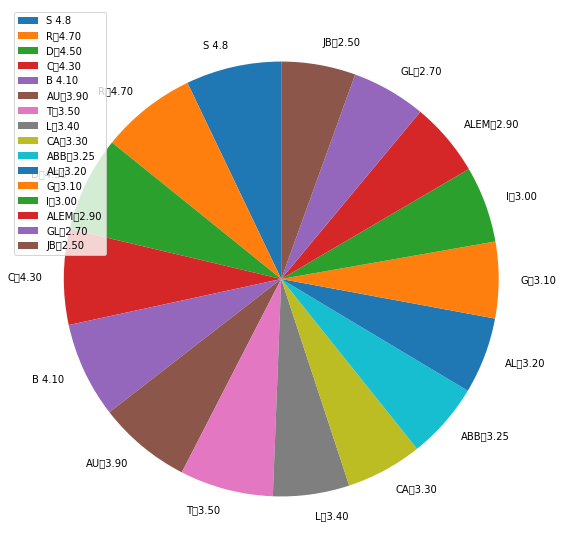

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
rating_labels=['S 4.8','R	4.70','D	4.50','C	4.30','B 4.10','AU	3.90','T	3.50','L	3.40',
          'CA	3.30','ABB	3.25','AL	3.20','G	3.10','I	3.00','ALEM	2.90','GL	2.70','JB	2.50']
rating_counts=[1596,1596,1596,1596,1596,1561,1561,1276,1276,1276,1276,1276,1276,1241,1241,1241]
plt.figure(figsize=(10,10))
plt.pie(rating_counts,labels=rating_labels,startangle=90)
plt.legend()
plt.show()

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S.No          22481 non-null  int64 
 1   Company_Name  22481 non-null  object
 2   NSE_Symbol    22481 non-null  object
 3   Rating        22481 non-null  object
 4   Industry      22481 non-null  object
 5   Drug_Name     22481 non-null  object
 6   Reason        22481 non-null  object
 7   Description   22467 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
combined_data.isnull().sum()

S.No             0
Company_Name     0
NSE_Symbol       0
Rating           0
Industry         0
Drug_Name        0
Reason           0
Description     14
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

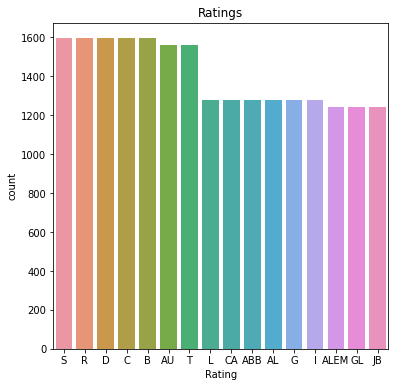

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="Rating",data=combined_data)
plt.title("Ratings")
plt.show

Text(0.5, 1.0, 'NSE_Symbol')

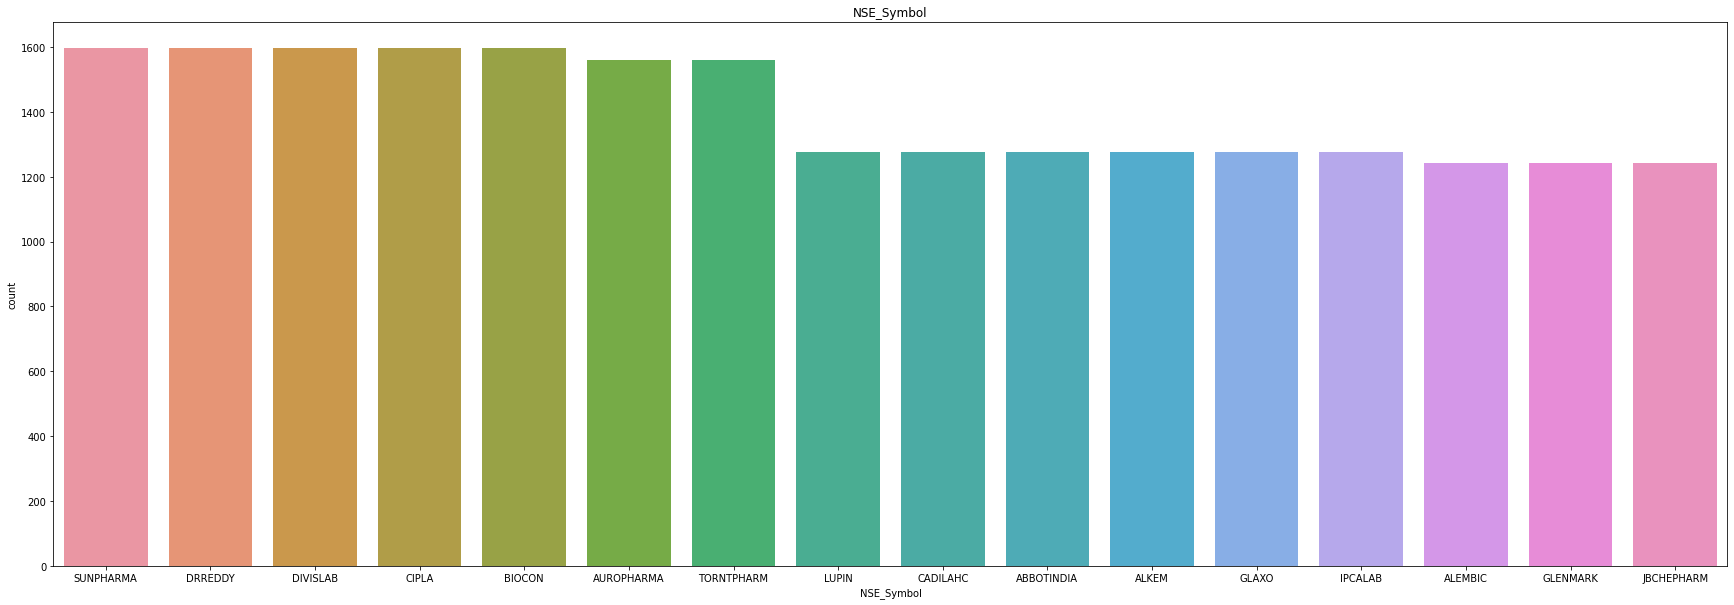

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x='NSE_Symbol',data=combined_data)
plt.title('NSE_Symbol')

Text(0.5, 1.0, 'Reason for the Medication')

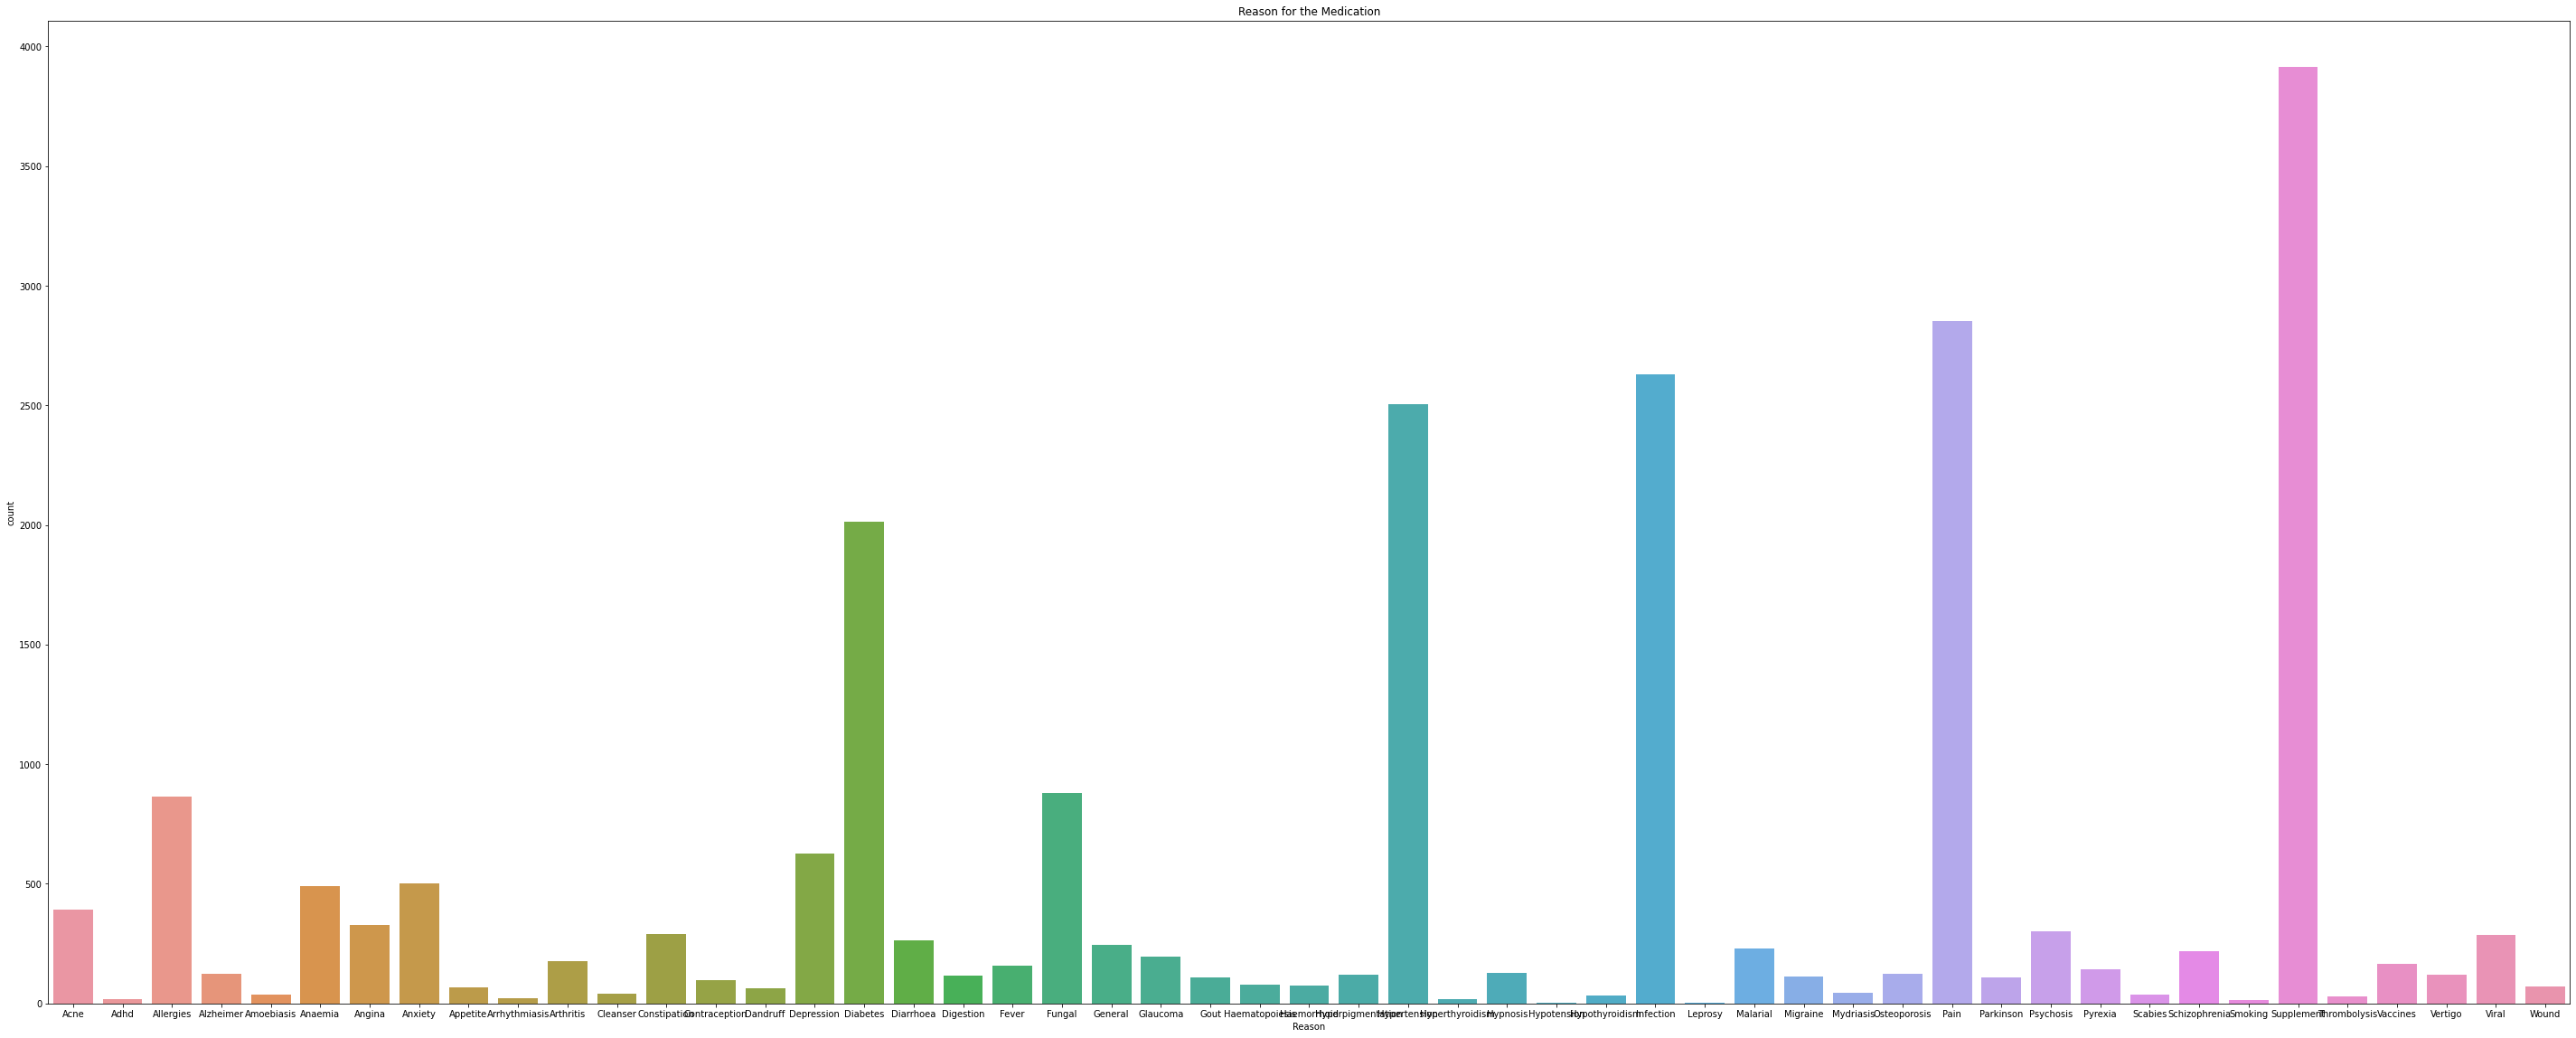

In [ ]:
plt.figure(figsize=(50,20))
sns.countplot(x='Reason',data=combined_data)
plt.title('Reason for the Medication')

In [ ]:
selected_features=['Company_Name','NSE_Symbol','Rating',"Industry","Drug_Name","Reason"]

In [ ]:
for z in selected_features:
  combined_data[z]=combined_data[z].fillna('')

In [ ]:
combined_features=combined_data['Company_Name']+" "+combined_data['NSE_Symbol']+" "+combined_data['Rating']+" "+combined_data['Industry']+" "+combined_data['Drug_Name']+" "+combined_data['Reason']

In [ ]:
print(combined_features)

0        Sun Pharmaceutical Industries Ltd. SUNPHARMA S...
1        Dr. Reddys Laboratories Ltd. DRREDDY R Pharmac...
2        Divis Laboratories Ltd. DIVISLAB D Pharmaceuti...
3        Cipla Ltd. CIPLA C Pharmaceuticals & Drugs ACG...
4        Biocon Ltd. BIOCON B Pharmaceuticals & Drugs A...
                               ...                        
22476    Divis Laboratories Ltd. DIVISLAB D Pharmaceuti...
22477    Cipla Ltd. CIPLA C Pharmaceuticals & Drugs Wok...
22478    Biocon Ltd. BIOCON B Pharmaceuticals & Drugs W...
22479    Aurobindo Pharma Ltd. AUROPHARMA AU Pharmaceut...
22480    Torrent Pharmaceuticals Ltd. TORNTPHARM T Phar...
Length: 22481, dtype: object


In [ ]:
#calling the TfidfVectorizer 
vectorizer=TfidfVectorizer()

In [ ]:
feature_vectors=vectorizer.fit_transform(combined_features)


In [ ]:
print(feature_vectors)

  (0, 3625)	0.1914160616683233
  (0, 3352)	0.2563017412592357
  (0, 20201)	0.2491095018413864
  (0, 1512)	0.37708530978173777
  (0, 22674)	0.26451941157954345
  (0, 9962)	0.17527920518056517
  (0, 6963)	0.7153422390357397
  (0, 8156)	0.038005513742125074
  (0, 15231)	0.038005513742125074
  (0, 21630)	0.13851444387170048
  (0, 12652)	0.038005513742125074
  (0, 11137)	0.13851444387170048
  (0, 15230)	0.13851444387170048
  (0, 21617)	0.13827720518786774
  (1, 1511)	0.14159423594296644
  (1, 4)	0.20011345539699815
  (1, 9)	0.18595149819502907
  (1, 16145)	0.7114040112422423
  (1, 8154)	0.0897075381368421
  (1, 11931)	0.05819674475114328
  (1, 15977)	0.08966134374809556
  (1, 8132)	0.08961523589275357
  (1, 3625)	0.12396875857957722
  (1, 1512)	0.4884312980301305
  (1, 9962)	0.3405536392557417
  :	:
  (22478, 260)	0.3221333971072321
  (22478, 5415)	0.3978138874150462
  (22478, 8156)	0.05457597324277921
  (22478, 15231)	0.05457597324277921
  (22478, 12652)	0.05457597324277921
  (22479, 9406)

In [ ]:
#getting the similarity scores of feature vectors using cosine similarity
similarity=cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.27040824 0.10398466 ... 0.00622256 0.00566555 0.00966197]
 [0.27040824 1.         0.13264556 ... 0.00402998 0.00366924 0.00625748]
 [0.10398466 0.13264556 1.         ... 0.00902491 0.00821704 0.10490389]
 ...
 [0.00622256 0.00402998 0.00902491 ... 1.         0.25379744 0.17098034]
 [0.00566555 0.00366924 0.00821704 ... 0.25379744 1.         0.29871756]
 [0.00966197 0.00625748 0.10490389 ... 0.17098034 0.29871756 1.        ]]


In [ ]:
#creating a list of the drugs
list_of_drugs=combined_data['Drug_Name'].tolist()
print(list_of_drugs)

['A CN Gel(Topical) 20gmA CN Soap 75gm', 'A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0.025% Gel 20gm', 'ACGEL CL NANO Gel 15gm', 'ACGEL NANO Gel 15gm', 'Acleen 1% Lotion 25ml', 'Aclene 0.10% Gel 15gm', 'Acnay Gel 10gm', 'Acne Aid Bar 50gmAcne Aid Bar 100gm', 'Acne UV Gel 60gm', 'Acne UV SPF 30 Gel 30gm', 'Acnecure Gel 20gm', 'Acnedap Gel 15gm', 'Acnedap Plus Gel 15gm', 'Acnehit Gel 15gm', 'Acnelak Soap 75gm', 'Acnelak Clz Cream 15gm', 'Acnelak Z Lotion 15gm', 'Acnemoist Cream 60gm', 'Acnerex Soap 75gm', 'Acneril 1% Gel 10gmAcneril Tablet 10Acneril 0.10% Cream 20gm', 'Acnesol 1% Solution 25mlAcnesol Gel 20gmAcnesol Solution 45ml', 'Acnesol A Nano Gel 15gm', 'Acnesol CL Gel 15gm', 'Acnestal Soap 75gm', "Acnestar 10mg Capsule 10'SAcnestar 2.5% Soap 75gmAcnestar S Soap 75gmAcnestar 20mg Capsule 10'S", "Acnetoin 20mg Capsule 10'SAcnetoin Gel 15gm", 'Acnetoin Plus Oinment 15gm', 'Acnetor AD 1% Ointment 15gm', 'Acnetor AD Cream 15Acnetor AD Gel 15gm', 'Acnewar Gel 15gm', 'Acnewar Plus Gel 1

In [ ]:
list_of_reason=combined_data['Reason'].tolist()
print(list_of_reason)

['Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne', 'Acne',

In [ ]:
#inputing the reason for medicine
reason_name=input('Enter the reason name:')
if len(reason_name)==0:
      #getting the drug name from user
    drug_namee=input('Enter the drug name:')
    # finding the closest matches for the drug
    find_closest_matches=difflib.get_close_matches(drug_namee,list_of_drugs)
    #print(find_closest_matches)
    close_match=find_closest_matches[0]
    #print(close_match)
    order_of_the_drug=combined_data[combined_data.Drug_Name==close_match]['S.No'].values[0]
    #print(order_of_the_drug)
else:
    find_closest_matches=difflib.get_close_matches(reason_name,list_of_reason)
    #print(find_closest_matches)
    #finding the closest match
    close_match=find_closest_matches[0]
    #print(close_match)
    order_of_the_drug=combined_data[combined_data.Reason==close_match]['S.No'].values[0]
    #print(order_of_the_drug)
similarity_score=list(enumerate(similarity[order_of_the_drug]))
      #print(similarity_score)
sorted_similar_drugs=sorted(similarity_score,key=lambda x:x[1],reverse=True)
      #print(sorted_similar_drugs)
print('The Drugs/Medicines recommended for you are:')
i=1
for a in sorted_similar_drugs:
    index=a[0]
    title_from_index=combined_data[combined_data.index==index].values[0]
    if (i<10):
      print(i,".",title_from_index)
      i+=1

Enter the reason name:acne
The Drugs/Medicines recommended for you are:
1 . [2 'Dr. Reddys Laboratories Ltd.' 'DRREDDY' 'R' 'Pharmaceuticals & Drugs'
 'A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0.025% Gel 20gm' 'Acne'
 'A RET 0.025% is a prescription medicine that is used to reduce fine wrinkles']
2 . [8270 'Glaxosmithkline Pharmaceuticals Ltd.' 'GLAXO' 'G'
 'Pharmaceuticals & Drugs' 'A Ret HC Cream 15gm' 'Hyperpigmentation'
 '\xa0treat melasma, acne induced hyperpigmentation, brown spots, uneven skin tone & dull complexion']
3 . [21220 'Alembic Pharmaceuticals Ltd.' 'ALEMBIC' 'ALEM'
 'Pharmaceuticals & Drugs' "RET 3D 2000IU Capsule 10'S" 'Supplement'
 'lowers\xa0the triglyceride level; Triglycerides are another form of fat, present in blood which promotes heart disease']
4 . [144 'Dr. Reddys Laboratories Ltd.' 'DRREDDY' 'R'
 'Pharmaceuticals & Drugs' 'Clinmax A Gel 30gmClinmax Gel 20gm' 'Acne'
 '\xa0treat mild to moderate acne(spots)']
5 . [105 'Dr. Reddys Laboratories Ltd.' 'DRRED

<ipython-input-28-9647eda941ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_score)


<Axes: ylabel='Density'>

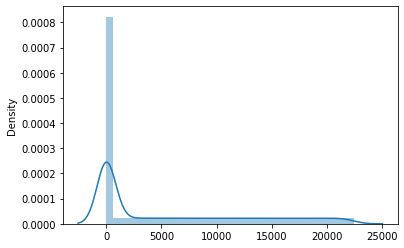

In [ ]:
sns.distplot(similarity_score)